# The environmental impact of food quality. Part 1: data exploration and cleaning#

This project focussed on the relationship between food quality and its environmental impact. Statistical analysis is carried out on the data sourced from the openfoodfact database. This notebook illustrates the first part of the project.

Import the data directly from openfoodfacts website using Pandas library

In [1]:

import pandas as pd 

all_food_data = pd.read_csv( "https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv", sep="\t", encoding="utf-8") # raw dataframe

all_food_data.info() # datasets infos and memory usage

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062834 entries, 0 to 1062833
Columns: 177 entries, code to carnitine_100g
dtypes: float64(119), int64(2), object(56)
memory usage: 1.4+ GB


# Preliminary exploration and variables selection

The file is fairly big, 177 columns with 1047591 rows each

In [2]:

all_food_data.shape # this returns the database size

(1062834, 177)

Detailed information about each column can be checked online at :
https://static.openfoodfacts.org/data/data-fields.txt

But:
Which columns are relevant for our study? and how much is stored in these columns? To answer these questions we run a for loop that returns for each the column name, its null values count and % of empty cells.

In [0]:
i = 0 # initialize column count
colnum = []
colname = []
nullpc = []
for col in all_food_data:
    i +=1 # update the counter
    nulsum = sum(pd.isnull(all_food_data[col])) # sum of null value for the column (empty cells)
    numrows = len(all_food_data)
    nuls_pourcent = (sum(pd.isnull(all_food_data[col]))/numrows)*100  # % of null value for the column
    r_nuls_pourcent = round(nuls_pourcent, 3) # return only the first 3 digits after the comma of the percentage float value
    #create columnstats database
    colnum.append(i) # first column: column number
    colname.append(col) # column name
    nullpc.append(r_nuls_pourcent) # % null values
    #print('Column ',i, ' name: ',col, '*   Null values (NaN) in this column: ', nulsum, ' % null: ', r_nuls_pourcent) # print the information for each row

In [0]:
df_nul = pd.DataFrame({'num':colnum, 'name':colname, '%null':nullpc})
df_nul = df_nul.sort_values(by='%null', ascending=False)


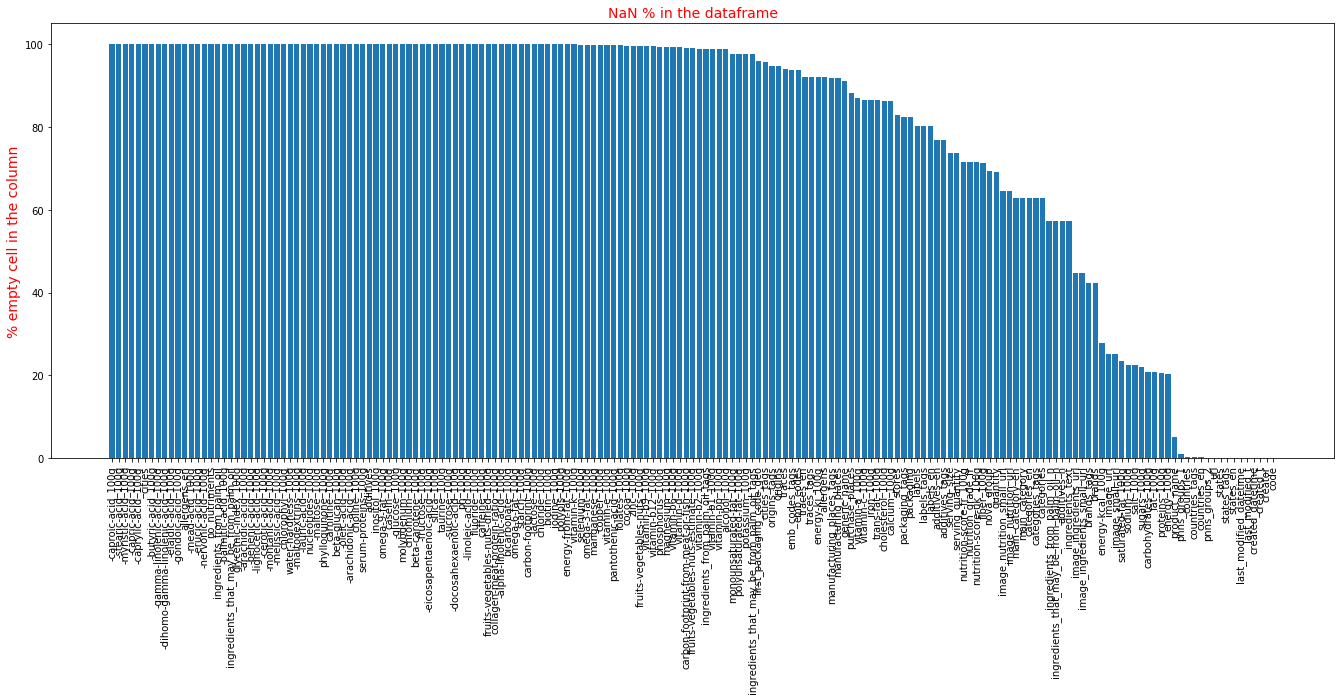

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(23,8))

plt.bar(df_nul['name'], df_nul['%null'])
plt.title('NaN % in the dataframe', color="red", fontsize = 14)
plt.ylabel('% empty cell in the column', color="red", fontsize = 14)
plt.xticks(rotation='vertical')
plt.rcParams['figure.constrained_layout.use'] = True
plt.savefig("null.png", format="PNG", dpi = 100)

carbon footprint is a necessary variable but has a high % of empty cells. Variables with a higher percentage can be dropped

In [6]:
df_nul[df_nul['name'].str.contains(r'carbon(?!$)')] # check for % null in the carbon footprint column

,num,name,%null
142,143,bicarbonate_100g,99.972
166,167,carbon-footprint_100g,99.962
167,168,carbon-footprint-from-meat-or-fish_100g,99.117


In [15]:
#indexcarbon = df_nul.name[df_nul.name == 'carbon-footprint_100g'].index.tolist()
indexcarbon = df_nul.set_index('name').index.get_loc( 'carbon-footprint_100g')
print ('row index containing carbon footprint % null is : ',indexcarbon)
nulthresold = df_nul.iloc[indexcarbon, 2]
print('carbon footprint % null is : ',nulthresold)

row index containing carbon footprint % null is :  63
carbon footprint % null is :  99.962


In [16]:

df_del = df_nul[df_nul['%null'] > nulthresold] 
df_keep = df_nul[df_nul['%null'] <= nulthresold] # data to keep
print(df_del.shape) # check number of columns that get left out 
df_keep.head()

(63, 3)


,num,name,%null
166,167,carbon-footprint_100g,99.962
113,114,-lactose_100g,99.959
144,145,chloride_100g,99.949
139,140,biotin_100g,99.945
156,157,iodine_100g,99.943


In [17]:
enoughfilled_list = df_keep['name'].tolist()
enoughfilled_list


['carbon-footprint_100g',
 '-lactose_100g',
 'chloride_100g',
 'biotin_100g',
 'iodine_100g',
 'polyols_100g',
 'energy-from-fat_100g',
 'vitamin-k_100g',
 'selenium_100g',
 'omega-3-fat_100g',
 'manganese_100g',
 'copper_100g',
 'vitamin-e_100g',
 'pantothenic-acid_100g',
 'folates_100g',
 'cocoa_100g',
 'zinc_100g',
 'fruits-vegetables-nuts_100g',
 'vitamin-b9_100g',
 'vitamin-b12_100g',
 'phosphorus_100g',
 'magnesium_100g',
 'vitamin-b6_100g',
 'vitamin-d_100g',
 'carbon-footprint-from-meat-or-fish_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'vitamin-b2_100g',
 'ingredients_from_palm_oil_tags',
 'vitamin-b1_100g',
 'vitamin-pp_100g',
 'alcohol_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'potassium_100g',
 'ingredients_that_may_be_from_palm_oil_tags',
 'first_packaging_code_geo',
 'cities_tags',
 'origins_tags',
 'origins',
 'traces',
 'emb_codes_tags',
 'emb_codes',
 'traces_en',
 'traces_tags',
 'energy-kj_100g',
 'allergens',
 'manufacturing_places_tags

In [18]:
new_food_data = all_food_data[enoughfilled_list] # create a new dataframe that contains only listed columns
new_food_data.shape

(1062834, 114)

There may be still row duplicates. Remove and check if there are any left.

In [19]:
    no_duplicates__food_data = new_food_data.drop_duplicates(keep=False) #remove duplicates 
    duplicateRowsDF = no_duplicates__food_data[no_duplicates__food_data.duplicated(keep=False)] # create a variable that identify any duplicate row in the dataframe
    print("All Duplicate Rows based on all columns are :")
    print(duplicateRowsDF)
    print('no more duplicates: yes!')

All Duplicate Rows based on all columns are :
Empty DataFrame
Columns: [carbon-footprint_100g, -lactose_100g, chloride_100g, biotin_100g, iodine_100g, polyols_100g, energy-from-fat_100g, vitamin-k_100g, selenium_100g, omega-3-fat_100g, manganese_100g, copper_100g, vitamin-e_100g, pantothenic-acid_100g, folates_100g, cocoa_100g, zinc_100g, fruits-vegetables-nuts_100g, vitamin-b9_100g, vitamin-b12_100g, phosphorus_100g, magnesium_100g, vitamin-b6_100g, vitamin-d_100g, carbon-footprint-from-meat-or-fish_100g, fruits-vegetables-nuts-estimate_100g, vitamin-b2_100g, ingredients_from_palm_oil_tags, vitamin-b1_100g, vitamin-pp_100g, alcohol_100g, monounsaturated-fat_100g, polyunsaturated-fat_100g, potassium_100g, ingredients_that_may_be_from_palm_oil_tags, first_packaging_code_geo, cities_tags, origins_tags, origins, traces, emb_codes_tags, emb_codes, traces_en, traces_tags, energy-kj_100g, allergens, manufacturing_places_tags, manufacturing_places, generic_name, purchase_places, vitamin-a_100

In [20]:
no_duplicates__food_data.shape

(1062806, 114)

In [21]:
print(list(no_duplicates__food_data)) # get headers

['carbon-footprint_100g', '-lactose_100g', 'chloride_100g', 'biotin_100g', 'iodine_100g', 'polyols_100g', 'energy-from-fat_100g', 'vitamin-k_100g', 'selenium_100g', 'omega-3-fat_100g', 'manganese_100g', 'copper_100g', 'vitamin-e_100g', 'pantothenic-acid_100g', 'folates_100g', 'cocoa_100g', 'zinc_100g', 'fruits-vegetables-nuts_100g', 'vitamin-b9_100g', 'vitamin-b12_100g', 'phosphorus_100g', 'magnesium_100g', 'vitamin-b6_100g', 'vitamin-d_100g', 'carbon-footprint-from-meat-or-fish_100g', 'fruits-vegetables-nuts-estimate_100g', 'vitamin-b2_100g', 'ingredients_from_palm_oil_tags', 'vitamin-b1_100g', 'vitamin-pp_100g', 'alcohol_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'potassium_100g', 'ingredients_that_may_be_from_palm_oil_tags', 'first_packaging_code_geo', 'cities_tags', 'origins_tags', 'origins', 'traces', 'emb_codes_tags', 'emb_codes', 'traces_en', 'traces_tags', 'energy-kj_100g', 'allergens', 'manufacturing_places_tags', 'manufacturing_places', 'generic_name', 'pu

In [23]:
nonan_df = no_duplicates__food_data.dropna(subset=['carbon-footprint_100g']) #drop most empty rows from the thresold category and check contents
nonan_df.head()

,carbon-footprint_100g,-lactose_100g,chloride_100g,biotin_100g,iodine_100g,polyols_100g,energy-from-fat_100g,vitamin-k_100g,selenium_100g,omega-3-fat_100g,manganese_100g,copper_100g,vitamin-e_100g,pantothenic-acid_100g,folates_100g,cocoa_100g,zinc_100g,fruits-vegetables-nuts_100g,vitamin-b9_100g,vitamin-b12_100g,phosphorus_100g,magnesium_100g,vitamin-b6_100g,vitamin-d_100g,carbon-footprint-from-meat-or-fish_100g,fruits-vegetables-nuts-estimate_100g,vitamin-b2_100g,ingredients_from_palm_oil_tags,vitamin-b1_100g,vitamin-pp_100g,alcohol_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,potassium_100g,ingredients_that_may_be_from_palm_oil_tags,first_packaging_code_geo,cities_tags,origins_tags,origins,traces,...,main_category_en,main_category,categories_en,categories_tags,categories,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,additives_n,ingredients_text,image_ingredients_url,image_ingredients_small_url,brands_tags,brands,energy-kcal_100g,image_url,image_small_url,saturated-fat_100g,sodium_100g,salt_100g,sugars_100g,carbohydrates_100g,fat_100g,proteins_100g,energy_100g,product_name,pnns_groups_1,countries,countries_tags,countries_en,pnns_groups_2,url,states,states_tags,states_en,last_modified_datetime,last_modified_t,created_datetime,created_t,creator,code
82305,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"toronto,ontario,canada","Toronto,Ontario,Canada",en:nuts,...,Spice-cookies,en:spice-cookies,Spice-cookies,en:spice-cookies,Spice cookies,NaN,NaN,NaN,NaN,NaN,NaN,dimpflmeier,Dimpflmeier,NaN,NaN,NaN,2.0,0.183,0.457,34.0,76.0,7.0,6.0,380.0,Pfeffernüsse,unknown,NaN,NaN,NaN,unknown,http://world-en.openfoodfacts.org/product/0060...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",2018-12-12T18:32:15Z,1544639535,2018-12-12T18:08:06Z,1544638086,breccy,60569008657
148188,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,reunion,Réunion,NaN,...,Meats,en:meats,"Meats,Prepared meats","en:meats,en:prepared-meats",Charcuterie,0.0,0.0,0.0,"Maigre, gras et sang de porc, eau, sel, poirea...",https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,porcidou,Porcidou,1247.0,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,9.3,0.640,1.600,4.2,10.0,23.0,13.0,1247.0,Boudins noirs nature,Fish Meat Eggs,France,en:france,France,Processed meat,http://world-en.openfoodfacts.org/product/0208...,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","To be checked,Complete,Nutrition facts complet...",2019-03-26T05:25:42Z,1553577942,2018-07-25T16:01:13Z,1532534473,kiliweb,0208015019813
148190,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,reunion,Réunion,NaN,...,Meats,en:meats,"Meats,Prepared meats","en:meats,en:prepared-meats",charcuterie,0.0,0.0,0.0,"5 BOUDINS NOIRS PIMENT MAIGRE, GRAS ET SANG DE...",https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,porcidou,Porcidou,1247.0,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,9.3,0.640,1.600,4.2,10.0,23.0,13.0,1247.0,5 boudins noirs piment,Fish Meat Eggs,France,en:france,France,Processed meat,http://world-en.openfoodfacts.org/product/0208...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",2019-03-26T05:28:13Z,1553578093,2019-02-23T08:49:10Z,1550911750,kiliweb,0208016022041
148197,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

column containing in the name '_tag' or '_en' have redundant information. Should be deleted

In [24]:
df_filteren = nonan_df.filter(regex='_en')
en = list(df_filteren)
df_filtertag = nonan_df.filter(regex='_tag')
tag = list(df_filtertag)
filterlist= en + tag
print(filterlist)

['traces_en', 'labels_en', 'additives_en', 'main_category_en', 'categories_en', 'countries_en', 'states_en', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags', 'cities_tags', 'origins_tags', 'emb_codes_tags', 'traces_tags', 'manufacturing_places_tags', 'packaging_tags', 'labels_tags', 'additives_tags', 'categories_tags', 'brands_tags', 'countries_tags', 'states_tags']


In [25]:
no_duplicates__food_data.drop(filterlist, axis = 1, inplace = True)
no_duplicates__food_data.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(1062806, 93)

In [26]:
# are French and British score the same? (suspiciously they have same %null)
print(nonan_df['nutrition-score-fr_100g'].equals(nonan_df['nutrition-score-uk_100g'])) # function that checks whether two columns contain same values

False


After a first cleaning step, we can now create subsets of the dataframe by choosing the columns relevant the statistical analysis. 


In [0]:
# first step : lists of columns we are interested for each section of the statistical study. 


eco_raw = ['product_name','nutrition-score-fr_100g', 'nutrition_grade_fr','nova_group', 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'categories', 'carbon-footprint_100g', 'carbon-footprint-from-meat-or-fish_100g', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']
df_eco_raw = no_duplicates__food_data[eco_raw] # this is the corresponding dataframe with raw data




# selection of relevant columns to describe the categories of food

In [42]:
print(df_eco_raw.pnns_groups_2.value_counts(dropna=True)) # sensible subdivision, even if a large part is unknown
print(df_eco_raw.pnns_groups_2.shape)

unknown                             730302
Biscuits and cakes                   26084
Sweets                               24051
One-dish meals                       21389
Cheese                               19663
Dressings and sauces                 18489
Processed meat                       16787
Milk and yogurt                      16708
Cereals                              14917
Fish and seafood                     12572
Meat                                 12400
Alcoholic beverages                  10558
Vegetables                           10310
Fats                                 10271
Fruits                                9709
Chocolate products                    9694
Bread                                 8707
Sweetened beverages                   8703
Appetizers                            8135
Salty and fatty products              7525
Fruit juices                          6551
Breakfast cereals                     5078
Nuts                                  4698
Legumes    

some categories in the PNNS_2 classification are double:one with lower case (fruits), and one with capital (Fruits)

In [45]:
df_eco_raw['pnns_groups_2'] = df_eco_raw['pnns_groups_2'].str.lower()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_eco_raw

0                       unknown
1                       unknown
2                       unknown
3          dressings and sauces
4                       unknown
                   ...         
1062829                 unknown
1062830                 unknown
1062831                    meat
1062832                 unknown
1062833                 unknown
Name: pnns_groups_2, Length: 1062806, dtype: object

In [46]:
print(df_eco_raw.pnns_groups_1.value_counts(dropna=True)) # very broad. Grouping fish, meat, eggs together would bias environmental impact 

unknown                    730302
Sugary snacks               59829
Milk and dairy products     44815
Fish Meat Eggs              43894
Cereals and potatoes        35324
Beverages                   29680
Fat and sauces              28760
Composite foods             26366
Fruits and vegetables       25361
Salty snacks                20358
sugary-snacks                3557
fruits-and-vegetables        2974
cereals-and-potatoes           46
salty-snacks                    5
Name: pnns_groups_1, dtype: int64


In [47]:
# categories section has too many entries to be representative, stats would be confusing
df_cat_count = pd.value_counts(df_eco_raw['categories'].values, sort=True) # transform the counts in a database

df_cat_count = df_cat_count.reset_index()
df_cat_count.columns = ['category', 'count']
df_cat_count = df_cat_count[df_cat_count['count'] > 500] # showing only those above 500 it can be seen that some are very similar 
print (df_cat_count)

                                             category  count
0                                            Boissons   4269
1       Viandes, Volailles, Poulets, Filets de poulet   1506
2                Boissons, Boissons avec sucre ajouté   1442
3                                    Matières grasses   1389
4   Snacks, Snacks sucrés, Chocolats, Chocolats noirs   1195
5                             Extra-virgin olive oils    942
6   Aliments et boissons à base de végétaux, Alime...    890
7   Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...    860
8                                               Wines    830
9   Produits laitiers, Produits fermentés, Produit...    822
10     Viandes, Charcuteries, Jambons, Jambons blancs    740
11        Snacks, Snacks sucrés, Confiseries, Bonbons    698
12                                          Moutardes    679
13                                     Jambons blancs    665
14                                            Lácteos    651
15                      

In [48]:
print(df_eco_raw.main_category.value_counts(dropna=True))

en:plant-based-foods-and-beverages    89295
en:snacks                             53391
en:beverages                          44609
en:dairies                            39353
en:meats                              32497
                                      ...  
it:it-legumi                              1
es:sobao-de-mantequilla                   1
es:queso-cortad                           1
es:agua-sabores                           1
fr:pizza-aux-fruits-de-mer                1
Name: main_category, Length: 10389, dtype: int64


In [0]:
# many categories in the main_category section. Some containing only one product are not descriptive
df_cat_count = pd.value_counts(df_eco_raw['main_category'].values, sort=True) # transform the counts in a database

df_cat_count = df_cat_count.reset_index()
df_cat_count.columns = ['main_category', 'count']
df_cat_count = df_cat_count[df_cat_count['count'] > 100] # filter low counts
print (df_cat_count)



                         main_category  count
0   en:plant-based-foods-and-beverages  89004
1                            en:snacks  53061
2                         en:beverages  44496
3                           en:dairies  39217
4                             en:meats  32445
5                         en:groceries  24389
6                             en:meals  18132
7                          en:desserts   7598
8                           en:seafood   7448
9                           en:spreads   7220
10                     en:fruit-juices   6591
11                     en:canned-foods   4876
12                     en:frozen-foods   4190
13               en:biscuits-and-cakes   3674
14                       en:sweeteners   2538
15              en:dietary-supplements   2138
16                       en:breakfasts   2045
17                       en:sandwiches   1814
18                         en:vinegars   1807
19                 en:farming-products   1693
20           en:fish-and-meat-and-

main_category contains too many values. Some with very few entries and even among those that have more than 100 entries some don't correspond actually to a food category but rather to a product (escalopes, bavette d'aloyau...)

To describe the food category the most informative column is pnns_groups_2. Even if a lot are labelled as unknown. 

# selection of variables that describe the nutritional quality

 And since the french food grade is inverse proportional to the score

In [49]:
grades = ['nutrition_grade_fr','nutrition-score-fr_100g']
df_food_grades = no_duplicates__food_data[grades] 
df_food_grades = df_food_grades.groupby(['nutrition_grade_fr']).mean()
df_food_grades = df_food_grades.reset_index(level=0, inplace=False) # nutrition grade as first column
df_food_grades


,nutrition_grade_fr,nutrition-score-fr_100g
0,a,-3.180331
1,b,0.845171
2,c,5.541373
3,d,13.839755
4,e,21.219651


based on the above table the two variables seem proportional. In the plot below it is clear that they are inverse proportional

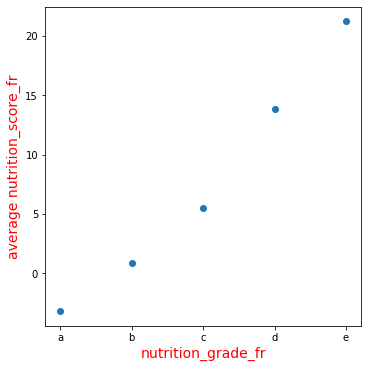

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(df_food_grades['nutrition_grade_fr'],  df_food_grades['nutrition-score-fr_100g'])

plt.xlabel('nutrition_grade_fr', color="red", fontsize = 14)
plt.ylabel('average nutrition_score_fr', color="red", fontsize = 14)
from google.colab import files
plt.savefig(" Nutrition grade.png", format="PNG")


To fit data of nutritional quality then rather than the average score, we can create a variable, with a value 'nutrition_av_grade_fr' directly proportional to the grade

In [51]:
df_food_grades['nutrition_grade_fr_n'] = 22 - df_food_grades['nutrition-score-fr_100g']
df_food_grades = df_food_grades.round(0)
df_food_grades.head()

,nutrition_grade_fr,nutrition-score-fr_100g,nutrition_grade_fr_n
0,a,-3.0,25.0
1,b,1.0,21.0
2,c,6.0,16.0
3,d,14.0,8.0
4,e,21.0,1.0


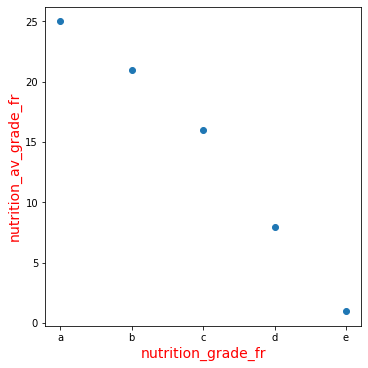

In [52]:
plt.figure(figsize=(5,5))
plt.scatter(df_food_grades['nutrition_grade_fr'],  df_food_grades['nutrition_grade_fr_n'])

plt.xlabel('nutrition_grade_fr', color="red", fontsize = 14)
plt.ylabel('nutrition_av_grade_fr', color="red", fontsize = 14)
from google.colab import files
plt.savefig(" Nutrition grade 2.png", format="PNG")

Due to the way the score is calculated, the above numerical representation works better than a simple inverse of the nutritional score

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Nutritional score')

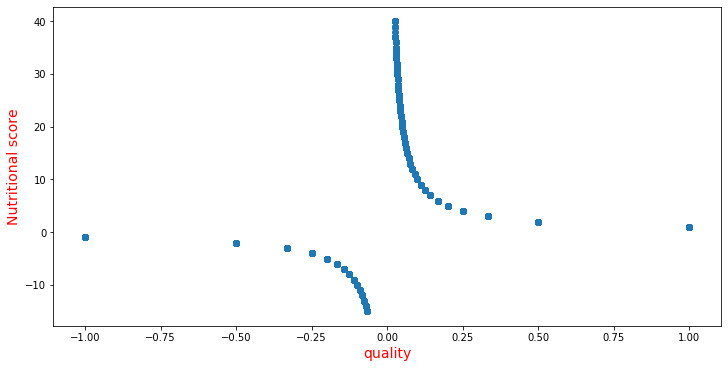

In [53]:
no_duplicates__food_data['Nutritional quality 100g'] = 1/no_duplicates__food_data['nutrition-score-fr_100g'] # inverse of nutritional score
plt.figure(figsize=(10,5))
plt.scatter(no_duplicates__food_data['Nutritional quality 100g'], no_duplicates__food_data['nutrition-score-fr_100g'])
plt.xlabel('quality', color="red", fontsize = 14)
plt.ylabel('Nutritional score', color="red", fontsize = 14)

We examine now the correlation of quality with nova grade, which indicates how much the food is processed

In [54]:
# convert food grades into numbers based on the category average food score
df_eco_raw ['nutrition_grade_fr_n'] = df_eco_raw ['nutrition_grade_fr']
df_eco_raw  = df_eco_raw.replace({'nutrition_grade_fr_n': {'a': 25, 'b': 21, 'c': 16, 'd': 8, 'e':1}})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
nova = ['nova_group','nutrition_grade_fr_n'] # how much is the food processed? nove class describes it
df_food_nova = df_eco_raw[nova] 
df_food_nova = df_food_nova.groupby(['nova_group']).mean()
df_food_nova = df_food_nova.reset_index(level=0, inplace=False) # gets nova class to the first column
df_food_nova



,nova_group,nutrition_grade_fr_n
0,1.0,20.109302
1,2.0,9.206726
2,3.0,13.554466
3,4.0,11.115227


In [56]:
import numpy as np

from sklearn import linear_model
X0 = np.matrix([np.ones(df_food_nova.shape[0]),df_food_nova['nutrition_grade_fr_n'] ]).T
y0 = np.matrix([df_food_nova['nova_group']]).T

regr = linear_model.LinearRegression() 
regr.fit(X0, y0)
y_pred = regr.predict(X0)
accuracy0 = regr.score(X0, y0)
print(accuracy0)

0.37778847846543884


In [57]:
# without the outlier
df_food_nova = df_food_nova.drop([1])
df_food_nova

,nova_group,nutrition_grade_fr_n
0,1.0,20.109302
2,3.0,13.554466
3,4.0,11.115227


In [58]:
X0 = np.matrix([np.ones(df_food_nova.shape[0]),df_food_nova['nutrition_grade_fr_n'] ]).T
y0 = np.matrix([df_food_nova['nova_group']]).T

regr = linear_model.LinearRegression() 
regr.fit(X0, y0)
y_pred = regr.predict(X0)
accuracy0 = regr.score(X0, y0)
print(accuracy0)

0.995361035225485


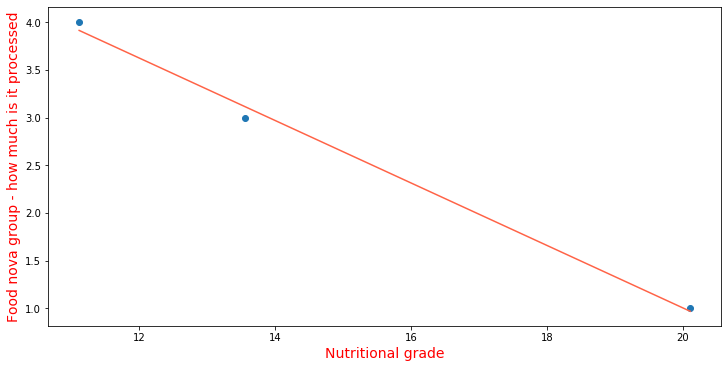

In [59]:
plt.figure(figsize=(10,5))
plt.scatter(df_food_nova['nutrition_grade_fr_n'], df_food_nova['nova_group'])
plt.plot(df_food_nova['nutrition_grade_fr_n'],y_pred, color = 'tomato' )
plt.xlabel('Nutritional grade', color="red", fontsize = 14)
plt.ylabel('Food nova group - how much is it processed', color="red", fontsize = 14)
from google.colab import files
plt.savefig("processed score.png", format="PNG")

In [66]:
eco_all = ['product_name','nutrition_grade_fr','nutrition_grade_fr_n', 'pnns_groups_2' , 'carbon-footprint_100g', 'carbon-footprint-from-meat-or-fish_100g', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']
df_eco_all = df_eco_raw[eco_all]
df_eco_all = df_eco_all.sort_values(by=['carbon-footprint_100g'], ascending=False) 
df_eco_all[:-10] # the first 10 rows of the dataframe after elimination of redundant columns
print(df_eco_all.shape)

(1062806, 8)


# selection of variables that describe the environmental impact

In [67]:
# lots of empty cells in the column 'carbon-footprint' and 'carbon-footprint-from-meat-or-fish_100g'. 
# Dropping for both limits the database to 10 rows only
df_eco_all_noNan = df_eco_all.dropna(subset=['carbon-footprint-from-meat-or-fish_100g', 'carbon-footprint_100g'])
df_eco_all_noNan = df_eco_all_noNan.sort_values(by=['carbon-footprint-from-meat-or-fish_100g'], ascending=False)
# After eliminating them we can see the relationship of this and the rest of the database
df_eco_all_noNan 


,product_name,nutrition_grade_fr,nutrition_grade_fr_n,pnns_groups_2,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
387907,Bœuf Bourguignon et ses Tagliatelles,c,16.0,one-dish meals,770.0,2899.80,0.0,0.0
385965,Saucisson à l'ail pur porc nature,d,8.0,processed meat,840.0,710.40,0.0,0.0
387458,Saucisses de Francfort,e,1.0,processed meat,825.0,592.00,0.0,0.0
386960,Mini Knacks,d,8.0,processed meat,835.0,547.60,0.0,0.0
387710,"Filet de Poulet tranché, cuit au four, nature",b,21.0,meat,855.0,394.45,0.0,0.0
778407,Salade De Saumon,d,8.0,one-dish meals,0.0,132.00,0.0,0.0
387918,Quiche saumon bocolis,d,8.0,pizza pies and quiches,660.0,125.45,0.0,0.0
388032,"Aiguillettes de poulet, sauce normande et son riz",b,21.0,one-dish meals,495.0,117.60,0.0,0.0
387607,Lasagnes aux 2 saumons et aux petits légumes,b,21.0,one-dish meals,430.0,81.85,0.0,0.0
487117,Hachis Parmentier,b,21.0,one-dish meals,0.0,77.90,0.0,0.0


In [155]:
# It can be observed from the above table that carbon-footprint-from-meat-or-fish_100g 	is not really informative
# specific only to those 10 products, so also this category can be eliminated for statistical treatment


df_eco = df_eco_all.drop(columns=['carbon-footprint-from-meat-or-fish_100g'])
df_eco.head()


,product_name,nutrition_grade_fr,nutrition_grade_fr_n,pnns_groups_2,carbon-footprint_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
864103,Suprême Noir Authentique,d,8.0,chocolate products,2842.0,0.0,0.0
385930,Viande des grisons,d,8.0,meat,2520.0,0.0,0.0
387890,Saucisson sec,e,1.0,processed meat,2380.0,0.0,0.0
856359,Chocolat blanc,e,1.0,chocolate products,1440.0,0.0,0.0
856360,Chocolat au lait,e,1.0,chocolate products,1321.0,0.0,0.0


In [63]:
palmoil = ['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']
df_palm = df_eco_all[palmoil]
df_palm = df_palm.dropna()
df_palm = df_palm.sort_values(by=['ingredients_from_palm_oil_n'], ascending=False)
df_palm.head()

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
16320,3.0,2.0
742160,2.0,0.0
744426,2.0,0.0
503554,2.0,0.0
1023565,2.0,0.0


While we don't consider the carbon footprint specific from meat and fish, both variables related to palm oil are kept since information for each is distinct

#Stats and outliers final check

In [156]:
numeric = ['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'carbon-footprint_100g']
df_n = df_eco[numeric]
df_n.head()
stats = df_n.describe()
stats.to_csv('stat.csv')
stats

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,carbon-footprint_100g
count,453482.000000,453482.000000,406.000000
mean,0.027134,0.071990,230.972698
std,0.164418,0.317007,363.447329
min,0.000000,0.000000,-0.000281
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,109.400000
75%,0.000000,0.000000,293.225000
max,3.000000,6.000000,2842.000000


the minimum value of carbon footprint is negative... rather unrealistic isn't it?

In [162]:

df_carbon = df_eco[df_eco['carbon-footprint_100g'] > 10] # filter unrealistic values
df_n = df_carbon[numeric]
df_n.describe() # have a look if now stats look reasonable

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,carbon-footprint_100g
count,242.000000,242.000000,260.000000
mean,0.024793,0.061983,360.366172
std,0.155817,0.288581,399.770300
min,0.000000,0.000000,12.000000
25%,0.000000,0.000000,124.750000
50%,0.000000,0.000000,203.430000
75%,0.000000,0.000000,418.550000
max,1.000000,2.000000,2842.000000


Finally we can export clean data relevant to our study into a new csv file, easy to import since is 50MB vs. 1.4GB for the whole data)

In [168]:
df_scaled =((df_n-df_n.min())/(df_n.max()-df_n.min()))*10
df_scaled = df_scaled.rename(columns={'ingredients_from_palm_oil_n': "palm_oil", 'ingredients_that_may_be_from_palm_oil_n': "palm oil?", 'carbon-footprint_100g': "CO2"})
df_scaled

,palm_oil,palm oil?,CO2
864103,0.0,0.0,10.000000
385930,0.0,0.0,8.862191
387890,0.0,0.0,8.367491
856359,0.0,0.0,5.045936
856360,0.0,0.0,4.625442
...,...,...,...
669867,0.0,0.0,0.017668
387187,0.0,0.0,0.008127
386078,0.0,0.0,0.006360
252297,NaN,NaN,0.000000


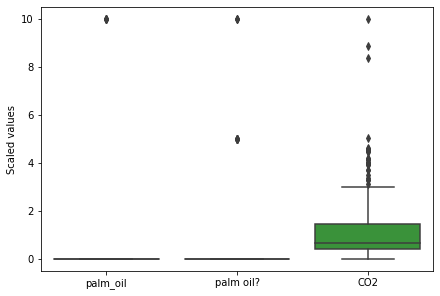

In [171]:
import seaborn as sns
%matplotlib inline
box_plot_scaled = sns.boxplot( data= df_scaled)
fig = box_plot_scaled.get_figure()
plt.ylabel("Scaled values")
fig.savefig("box.png", dpi= 100)

In [0]:
df_eco.to_csv('openfoodfacts_Eco.csv')